In [2]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import lasio
import cv2 as cv
from tqdm import tqdm
from dtw import *
import pandas as pd
import seaborn as sns
from Auto_picking import *


Only engine='normal' can read wrapped files


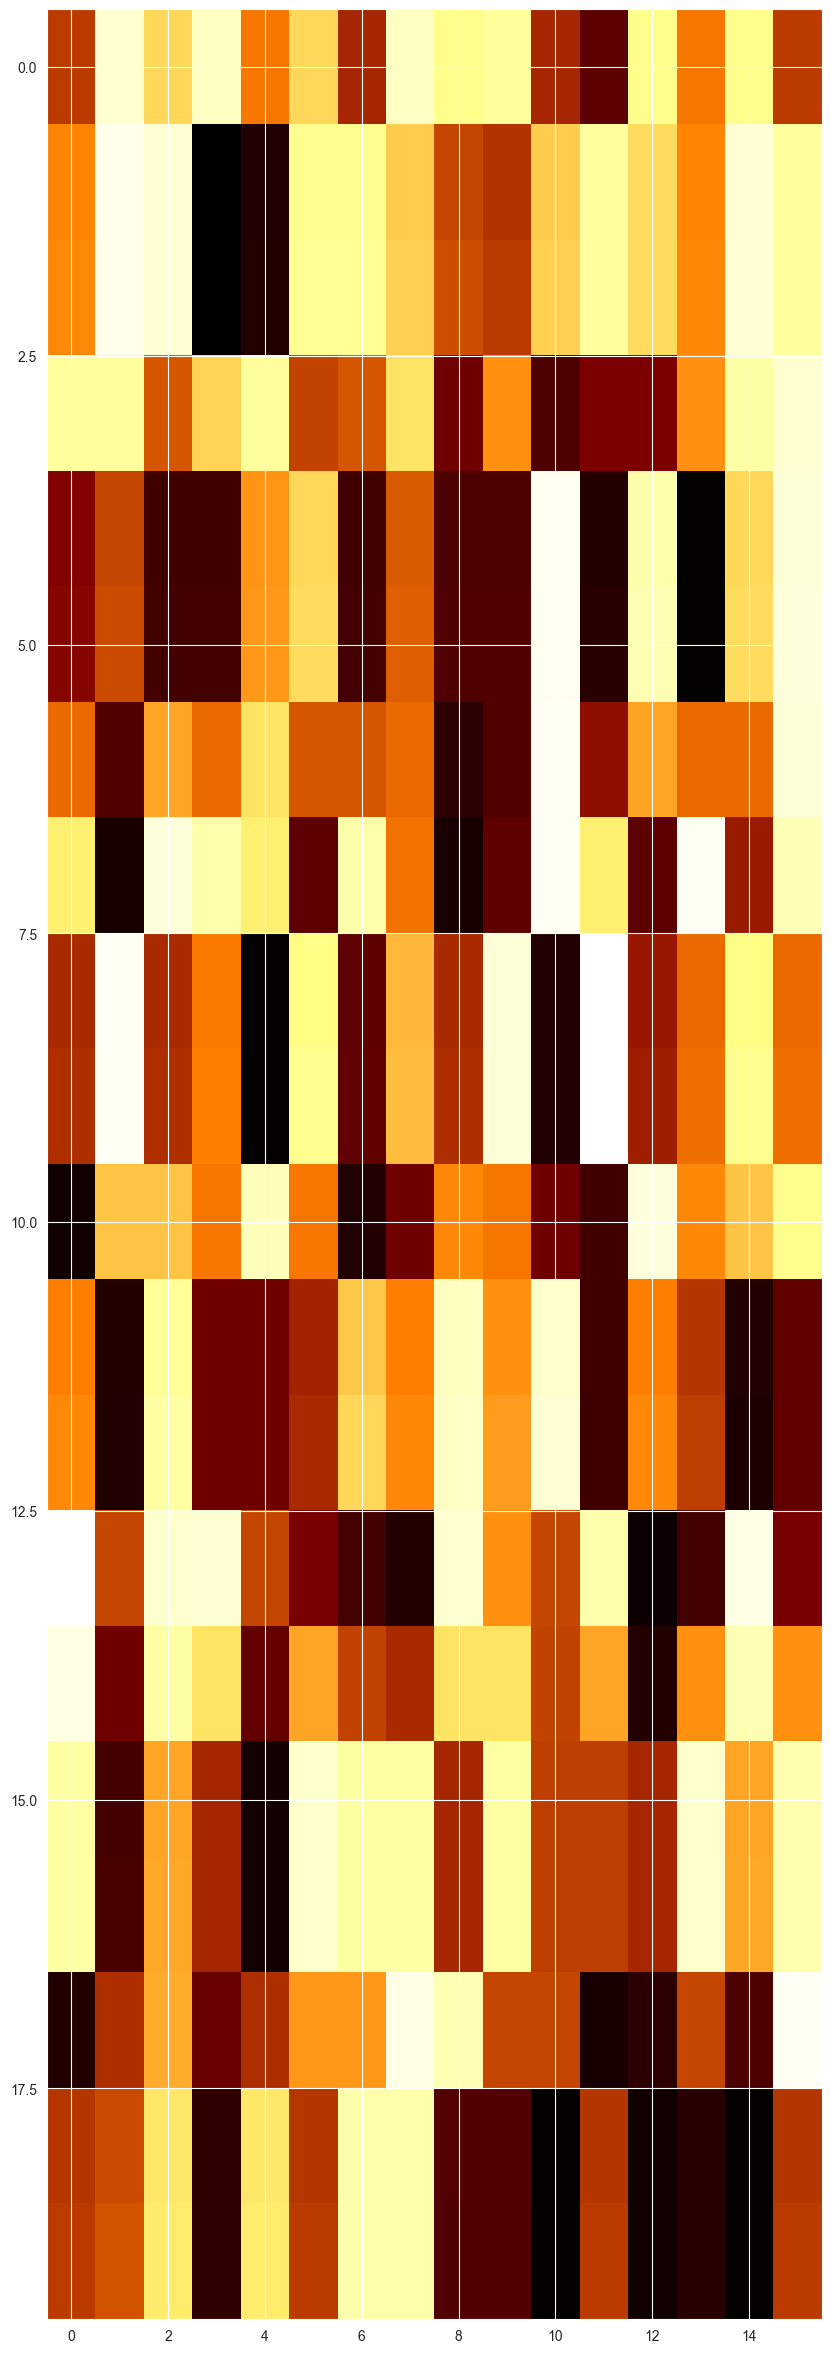

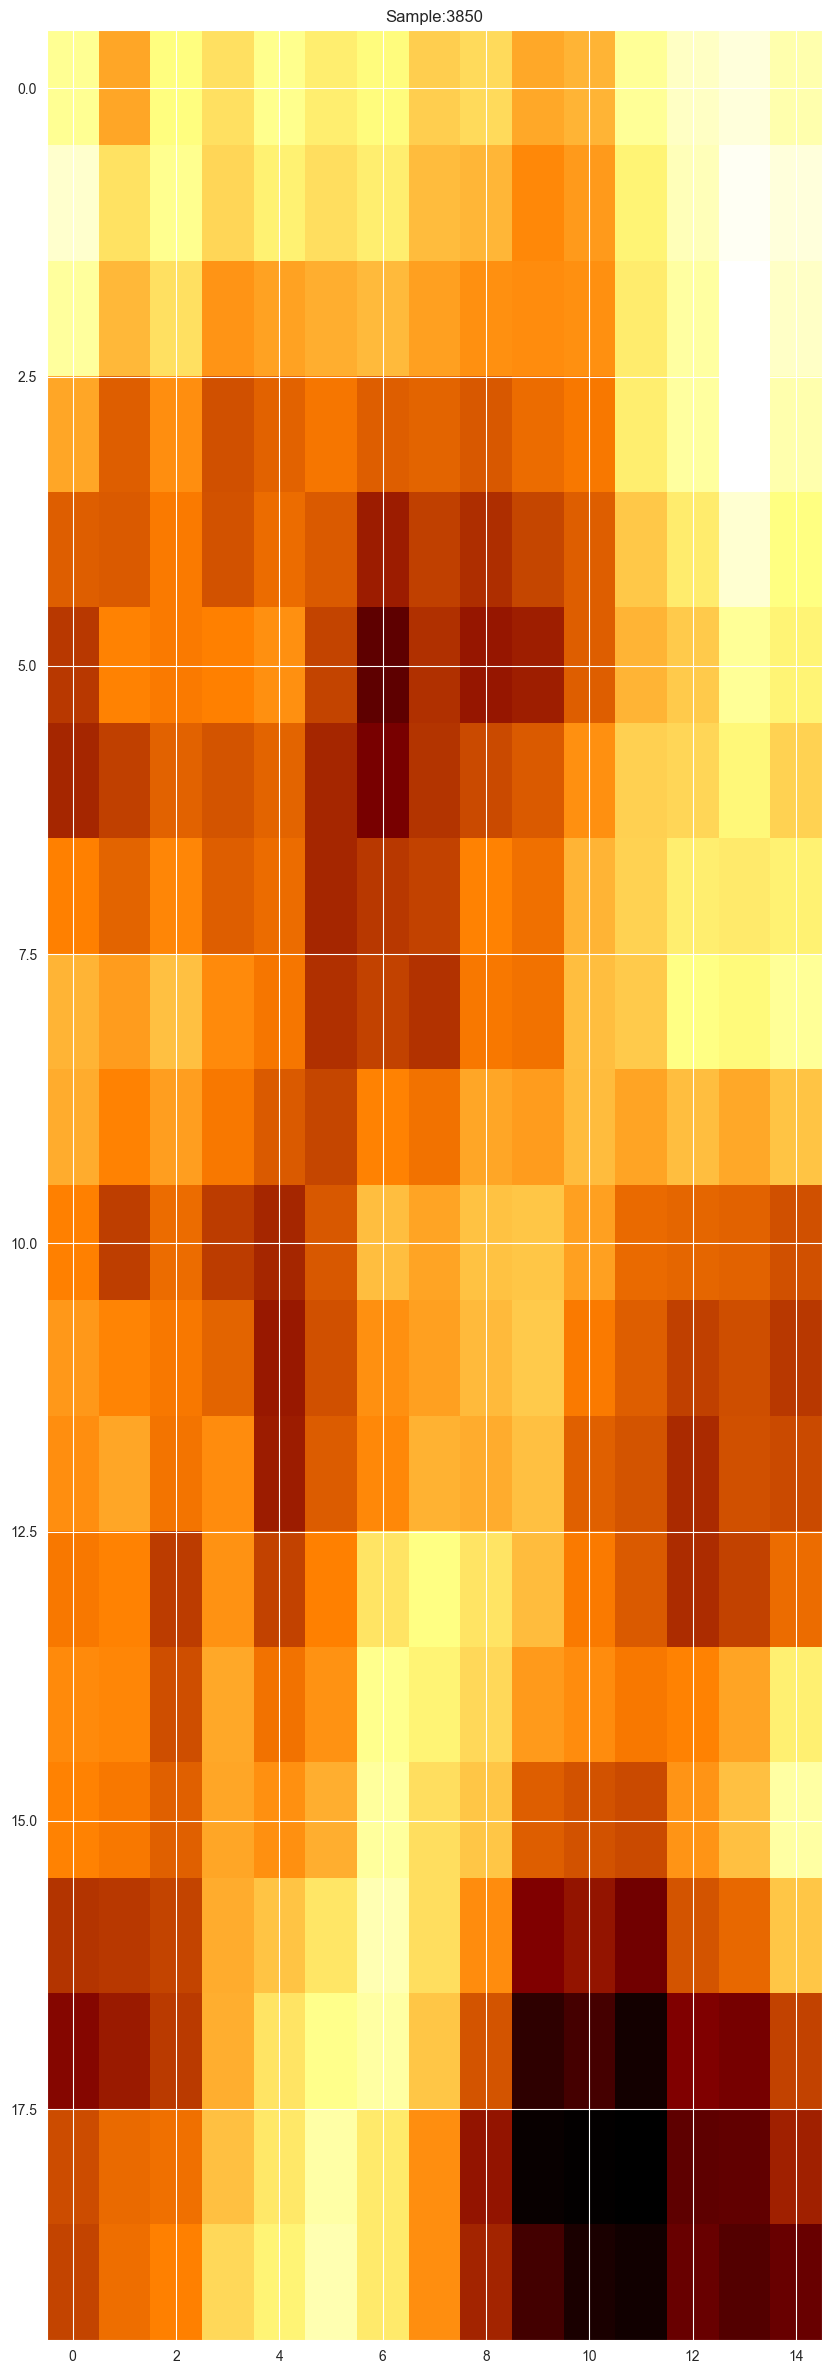

(12684, 16)


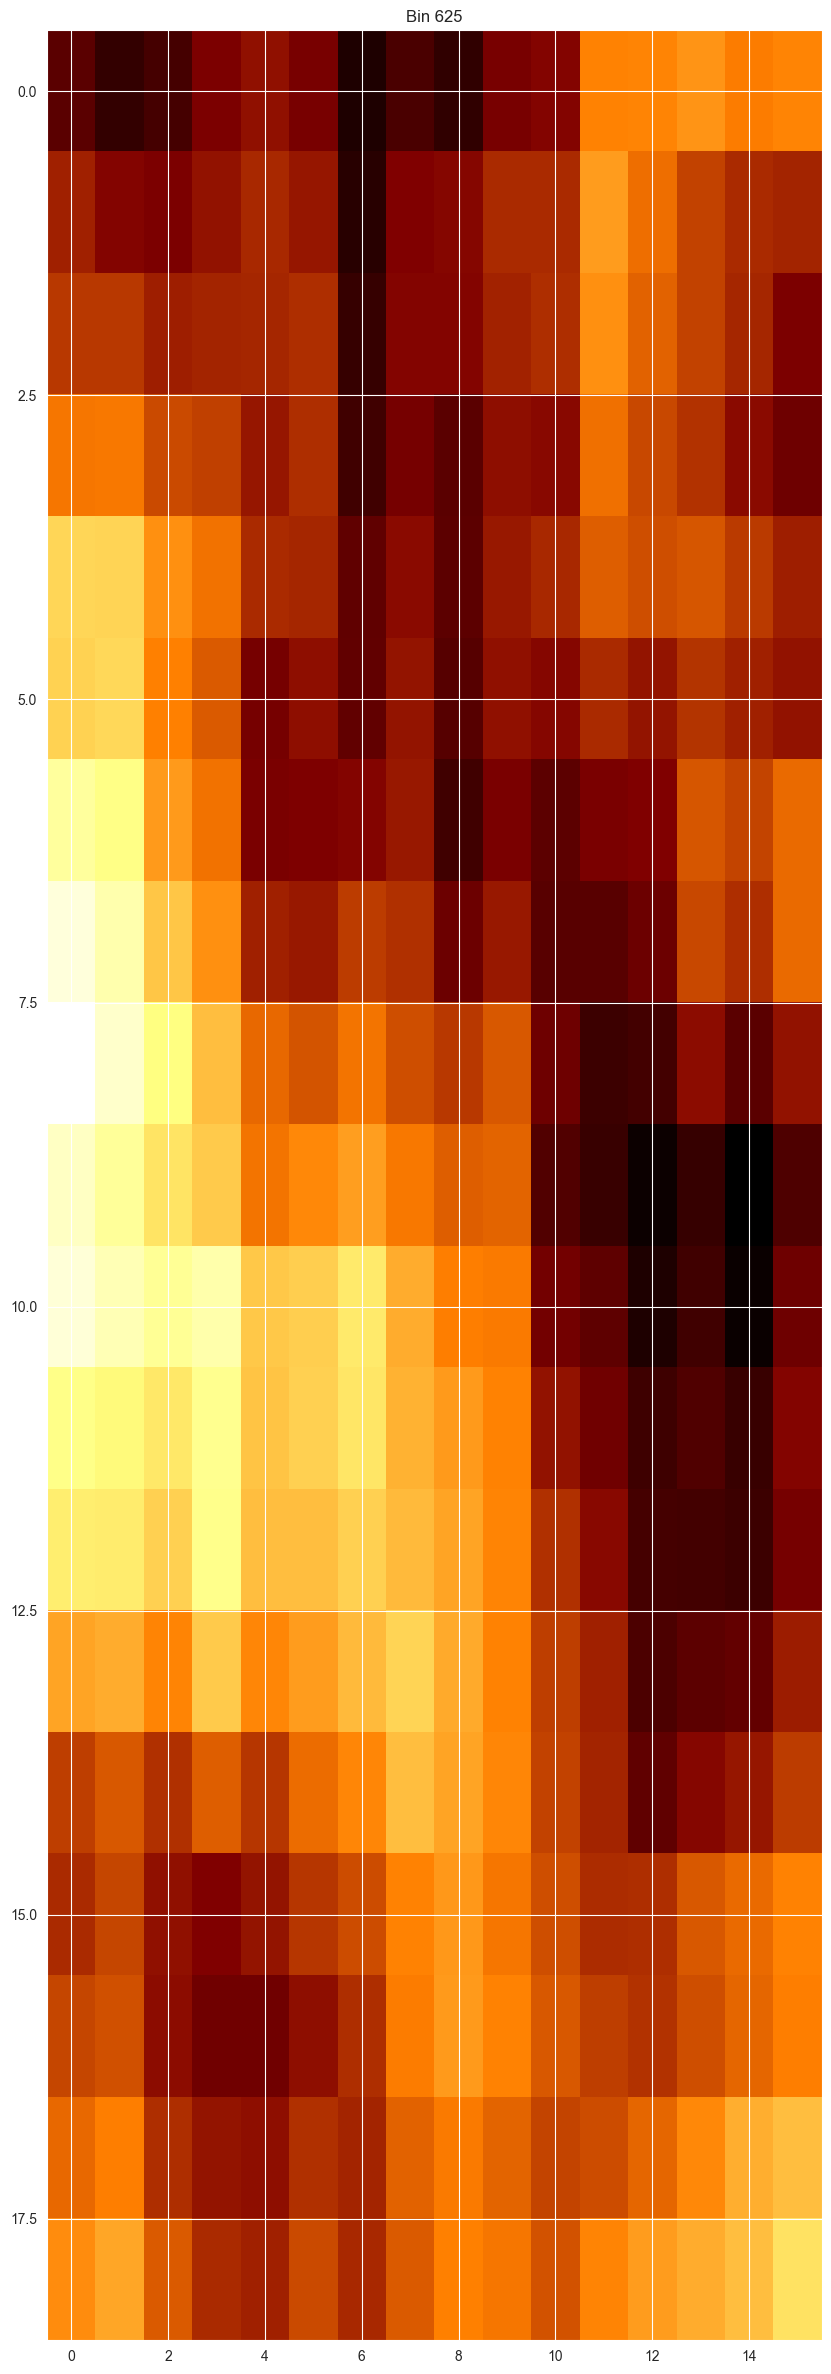

100%|██████████| 634/634 [00:00<00:00, 90485.53it/s]

[[[ 117.39999738    3.95999991 -119.59999733 ...  203.19999546
    191.99999571  185.83999585]
  [  68.03999848    2.79999994  -62.5999986  ...   90.03999799
     96.31999785  101.43999773]
  [  18.71999958    6.15999986    0.79999998 ...  -28.67999936
     -1.71999996   17.63999961]
  ...
  [ -23.39999948  -24.31999946  -10.59999976 ...  -11.79999974
    -19.67999956  -19.27999957]
  [-119.43999733  -31.2799993    63.39999858 ...  -54.59999878
   -108.91999757 -153.23999657]
  [-175.03999609  -27.55999938  124.23999722 ... -131.39999706
   -190.03999575 -244.07999454]]

 [[ 146.75999672   32.75999927  -96.67999784 ...  181.71999594
    188.59999578  196.51999561]
  [  86.63999806   38.11999915  -24.39999945 ...  100.51999775
    103.43999769  103.27999769]
  [  32.59999927   33.15999926   28.47999936 ...   -0.79999998
     17.51999961   25.83999942]
  ...
  [ -20.27999955   23.71999947   69.87999844 ...  -17.03999962
    -24.59999945  -35.23999921]
  [ -24.63999945   26.27999941   82.

In [3]:
# caricamento dati
path = 'data/'
name = 'CORAL_07_DIR_DYNAMIC.las'

data, a = read_las(path, name)

data_smooth = smoothing(data, a)
print(data_smooth.shape)

data_resh = reshape(data_smooth, 20)
data_sobel, threshold, ds_fl, maximum, max_pt = Sobel_calc(data_resh, 20, k_size=5, a=a)
print(data_sobel)


In [4]:
maxima, data_sobel_norm, int_points = get_interesting_points(data_sobel, threshold)

In [5]:
dtw_data, dtw_data_guided, block_df, interesting_data = dtw_calc(data_sobel, int_points, guide=True)

100%|██████████| 634/634 [00:46<00:00, 13.66it/s]


In [6]:
DF = pd.DataFrame(data_smooth.T).T
DF.head(60)  # pandas indexing dataframe[column][row]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,119.759997,117.959997,113.039997,103.639998,91.879998,78.399998,61.559999,47.119999,35.519999,32.519999,31.559999,39.679999,53.919999,71.359998,80.999998,84.919998
1,119.999997,117.959997,112.519997,102.799998,91.439998,77.359998,60.759999,46.799999,35.279999,30.959999,30.759999,39.279999,53.199999,71.199998,81.399998,85.559998
2,120.039997,118.439997,112.479997,103.399998,91.759998,77.879998,61.439999,47.599999,36.799999,31.999999,32.039999,39.959999,53.079999,70.119998,79.879998,83.599998
3,121.759997,119.599997,113.559997,104.639998,92.759998,78.839998,62.199999,48.479999,37.719999,33.159999,33.039999,41.399999,54.879999,70.479998,80.639998,84.239998
4,121.239997,119.919997,113.479997,105.719998,93.999998,79.999998,62.879999,49.559999,38.799999,33.919999,33.679999,42.119999,54.319999,68.919998,77.959998,82.199998
5,119.519997,118.639997,111.599998,103.639998,91.719998,77.279998,60.159999,47.679999,36.839999,32.319999,33.639999,42.399999,54.079999,68.359998,76.959998,80.839998
6,119.559997,118.599997,111.479998,102.839998,90.439998,75.879998,59.359999,46.999999,37.479999,33.719999,35.719999,43.239999,54.559999,68.519998,76.519998,79.119998
7,118.479997,117.199997,111.279998,103.119998,90.959998,75.079998,58.719999,45.239999,34.759999,31.159999,34.159999,41.599999,53.039999,67.239998,75.039998,77.719998
8,115.519997,114.799997,109.399998,101.039998,89.999998,74.119998,56.679999,43.079999,32.559999,27.439999,30.439999,38.719999,49.839999,64.639999,72.919998,75.919998
9,114.479997,113.439997,108.439998,100.279998,88.159998,71.319998,53.679999,38.439999,27.439999,21.680000,25.679999,33.639999,45.959999,61.799999,71.759998,73.879998


In [7]:

int_data_figo = np.array([np.array((i[0] * 20 + i[2], i[1])) for i in interesting_data])
ipoint = int_data_figo[40]


In [8]:
def manhattan_distance(target_seq, input_seq):
    return np.abs(input_seq - target_seq)
fette = []
def get_target_fetta(point):
    row = point[0]
    col = point[1]
    try:
        fetta_target = DF[col][row - 5 : row + 6]
        new_col = col + 1
        for i in range(-5, 6):
            fetta_input = DF[new_col][row - 5 - i: row + 6 - i]
            distance = dtw(fetta_target.to_numpy(), fetta_input.to_numpy(), manhattan_distance)[0]
            try:
                if distance <= min_distance:
                    min_fetta = fetta_input
                    min_distance = min(distance, min_distance)
            except:
                min_distance = distance
                min_fetta = fetta_input
        new_row = min_fetta.iloc[5:6].index[0]
        return min_distance, (new_row, new_col)

    except AssertionError:
        return 0, (0, 0)

In [11]:
def calculate_distances_from_ipoint(point):
    result_distances = []
    row = point[0]
    col = point[1]
    try:
        for i in range(col, 16):
            distance, new_coords = get_target_fetta((row, i))
            result_distances.append((distance,new_coords))
            row = new_coords[0]
            result_distances.append(new_coords)
    except:
        for i in range(0, col):
            distance, new_coords = get_target_fetta((row, i))
            result_distances.append((distance,new_coords))
            row = new_coords[0]
            result_distances.append(new_coords)


    # for res in pool.imap_ordered(calculate_distances_from_ipoint, int_data_figo):
    #     risultatissimo.append(res)
    #     pbar.update()
risultatissimo = []


In [15]:
def do_points_monocore(ipoints):
    risultatissimo = []
    for point in tqdm(range(len(ipoints))):
        result_dist = calculate_distances_from_ipoint(ipoints[point])
        risultatissimo.append(result_dist)
    return risultatissimo




  0%|          | 0/7981 [00:00<?, ?it/s]


  0%|          | 11/7981 [00:00<01:23, 95.57it/s]


  0%|          | 21/7981 [00:01<08:22, 15.84it/s]


  0%|          | 26/7981 [00:01<09:53, 13.41it/s]


  0%|          | 29/7981 [00:01<10:37, 12.47it/s]


  0%|          | 32/7981 [00:02<11:14, 11.79it/s]


  0%|          | 34/7981 [00:02<11:35, 11.42it/s]


  0%|          | 36/7981 [00:02<11:55, 11.11it/s]


  0%|          | 38/7981 [00:02<12:13, 10.83it/s]


  1%|          | 40/7981 [00:03<12:29, 10.60it/s]


  1%|          | 42/7981 [00:03<12:41, 10.42it/s]


  1%|          | 44/7981 [00:03<12:51, 10.29it/s]


  1%|          | 46/7981 [00:03<12:57, 10.21it/s]


  1%|          | 48/7981 [00:03<13:02, 10.14it/s]


  1%|          | 50/7981 [00:04<13:05, 10.10it/s]


  1%|          | 52/7981 [00:04<13:06, 10.08it/s]


  1%|          | 54/7981 [00:04<13:10, 10.03it/s]


  1%|          | 56/7981 [00:04<13:11, 10.02it/s]


  1%|          | 58/7981 [00:04<13:14,  9.98it/s]


  1%|          | 6

In [ ]:
def do_points_multicore(ipoints):
    from multiprocessing import Pool
    from functools import partial
    risultatissimo = []
    with tqdm(len(int_data_figo)) as pbar, Pool(processes=24) as pool:
        for res in pool.imap(calculate_distances_from_ipoint, int_data_figo):
            risultatissimo.append(res)
            pbar.update()
    return risultatissimo




0it [00:00, ?it/s]

In [ ]:
print(risultatissimo)